In [1]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# ls /projects/stockprediction/01_data/
# Import data
data = pd.read_csv('/projects/core-stockprediction/01_data/data_stocks.csv')

type(data)
data.loc[0:10, 'SP500']
data.head()

# Drop date variable
data = data.drop(['DATE'], 1)

# # Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# # print("rows %d" % n)
# # print("cols %d" % p)

# # Make data a np.array
data = data.values

# data[0:1]
%who


pandas.core.frame.DataFrame

0     2363.6101
1     2364.1001
2     2362.6799
3     2364.3101
4     2364.8501
5     2365.6201
6     2365.2000
7     2365.2900
8     2364.3201
9     2364.6399
10    2364.5801
Name: SP500, dtype: float64

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


InteractiveShell	 MinMaxScaler	 data	 n	 np	 p	 pd	 plt	 tf	 



In [3]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n


data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

# print(np.arange(train_start, train_end))
print(data[0, :10])

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# print("scaled")
# print(data_train[0])

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

print("X")
print(X_train.shape)
print("Y")
print(y_train.shape)

# Number of stocks in training data
n_stocks = X_train.shape[1]
print("number of stocks in training")
print(n_stocks)

[ 2363.6101    42.33     143.68     129.63      82.04     102.23      85.22
    59.76     121.52      38.99  ]


MinMaxScaler(copy=True, feature_range=(-1, 1))

X
(33012, 500)
Y
(33012,)
number of stocks in training
500


weight initializer
Tensor("random_uniform_4:0", shape=(500, 1024), dtype=float32)
('MSE Train: ', 0.47724012)
('MSE Test: ', 0.99443442)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 1.32296646  1.32185388  1.32520199 ...,  1.98797429  1.98247099
  1.98549247]


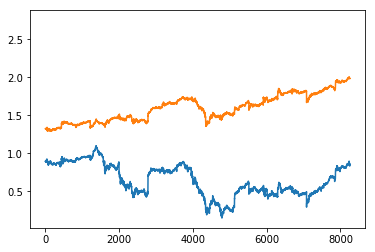

Text(0.5,1,u'Epoch 0, Batch 0')

('MSE Train: ', 0.00048854481)
('MSE Test: ', 0.073913097)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.87168002  0.8716802   0.87204963 ...,  1.04319644  1.034688    1.04039931]


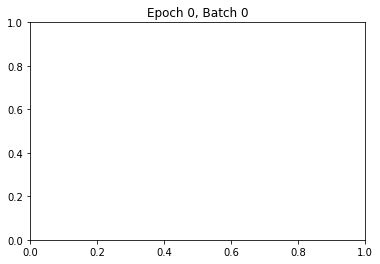

Text(0.5,1,u'Epoch 0, Batch 50')

('MSE Train: ', 0.00022602803)
('MSE Test: ', 0.068794549)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.8950848   0.89524913  0.89538711 ...,  1.04595339  1.03713536
  1.04330838]


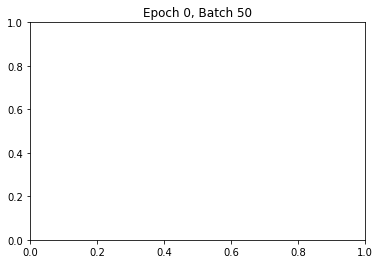

Text(0.5,1,u'Epoch 0, Batch 100')

('MSE Train: ', 0.00020577728)
('MSE Test: ', 0.066914625)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89473063  0.89478856  0.89486015 ...,  1.04725695  1.03762233
  1.04455364]


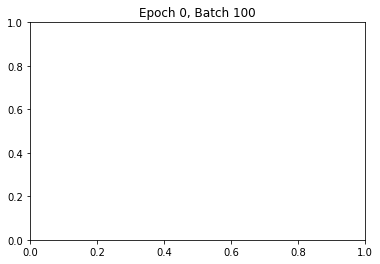

Text(0.5,1,u'Epoch 1, Batch 0')

('MSE Train: ', 0.00013738649)
('MSE Test: ', 0.060761243)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88041568  0.88022578  0.88013685 ...,  1.03019023  1.01990128
  1.02720308]


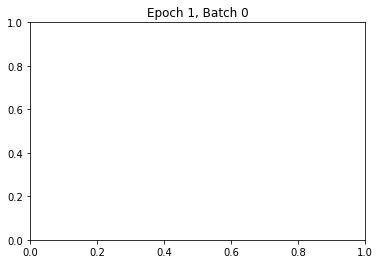

Text(0.5,1,u'Epoch 1, Batch 50')

('MSE Train: ', 0.00037674906)
('MSE Test: ', 0.052437354)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.8833406   0.88308811  0.88293445 ...,  1.00701284  0.99626803
  1.00382876]


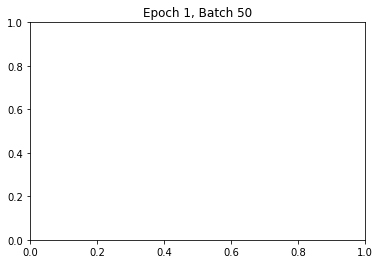

Text(0.5,1,u'Epoch 1, Batch 100')

('MSE Train: ', 0.00021277176)
('MSE Test: ', 0.050773196)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89467621  0.89439547  0.89413846 ...,  1.00617981  0.99602473
  1.0030328 ]


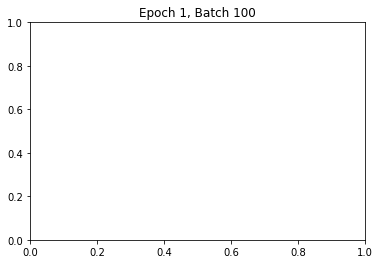

Text(0.5,1,u'Epoch 2, Batch 0')

('MSE Train: ', 0.00011079605)
('MSE Test: ', 0.050266668)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89818549  0.89785224  0.89748716 ...,  1.00712073  0.9961822
  1.00407457]


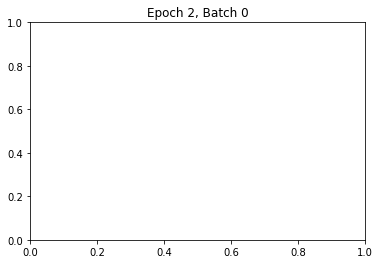

Text(0.5,1,u'Epoch 2, Batch 50')

('MSE Train: ', 0.0001374078)
('MSE Test: ', 0.051299445)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.90645665  0.90629798  0.90599012 ...,  1.01472259  1.00345004
  1.01156938]


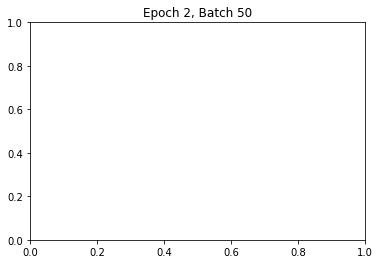

Text(0.5,1,u'Epoch 2, Batch 100')

('MSE Train: ', 8.4435371e-05)
('MSE Test: ', 0.049462356)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.90828329  0.90786749  0.90740234 ...,  1.00976455  0.99829608
  1.00650251]


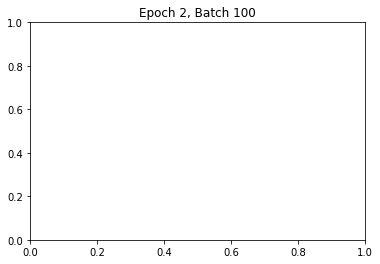

Text(0.5,1,u'Epoch 3, Batch 0')

('MSE Train: ', 0.00021155231)
('MSE Test: ', 0.046910588)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.90846884  0.90807122  0.90772825 ...,  1.00940406  0.99832594
  1.00641286]


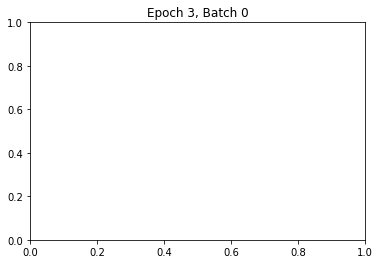

Text(0.5,1,u'Epoch 3, Batch 50')

('MSE Train: ', 8.2759718e-05)
('MSE Test: ', 0.044098109)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.90855074  0.90804243  0.90740359 ...,  1.00432229  0.99348629
  1.00152576]


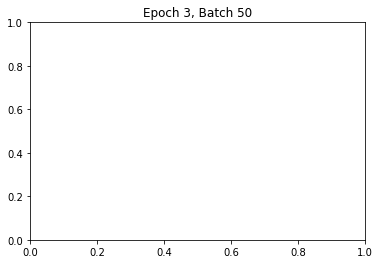

Text(0.5,1,u'Epoch 3, Batch 100')

('MSE Train: ', 6.7150846e-05)
('MSE Test: ', 0.042399067)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89613062  0.89553404  0.89489102 ...,  1.00060046  0.98972112
  0.99772209]


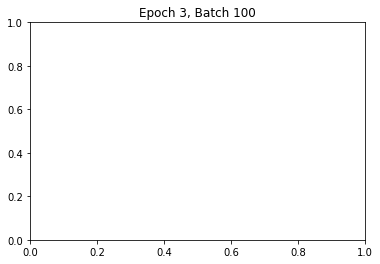

Text(0.5,1,u'Epoch 4, Batch 0')

('MSE Train: ', 6.2808591e-05)
('MSE Test: ', 0.040879909)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.90257567  0.90198749  0.90126878 ...,  0.9919368   0.98091537
  0.98919743]


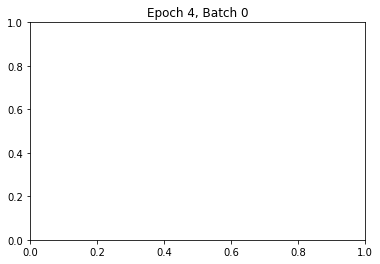

Text(0.5,1,u'Epoch 4, Batch 50')

('MSE Train: ', 8.2298131e-05)
('MSE Test: ', 0.035591494)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88963658  0.88883793  0.88836408 ...,  0.9716953   0.96077937
  0.96887439]


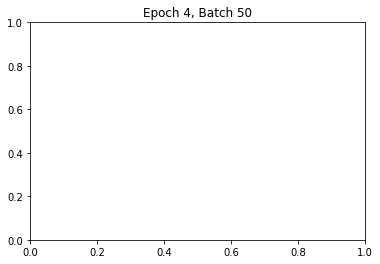

Text(0.5,1,u'Epoch 4, Batch 100')

('MSE Train: ', 0.00011320657)
('MSE Test: ', 0.03523225)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88542801  0.88468665  0.88416928 ...,  0.97362411  0.96298587
  0.97073537]


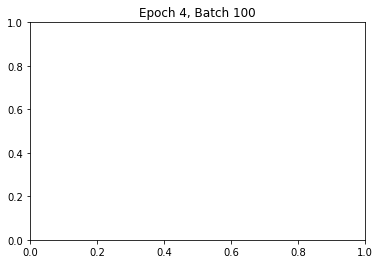

Text(0.5,1,u'Epoch 5, Batch 0')

('MSE Train: ', 0.00010053296)
('MSE Test: ', 0.036273099)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91113055  0.91030085  0.90972209 ...,  0.98326838  0.97150284
  0.9799273 ]


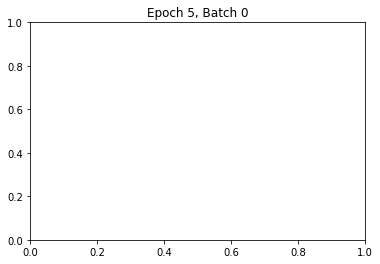

Text(0.5,1,u'Epoch 5, Batch 50')

('MSE Train: ', 0.0001024726)
('MSE Test: ', 0.033942919)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.9046104   0.90373975  0.90298927 ...,  0.97028714  0.95866585
  0.96694428]


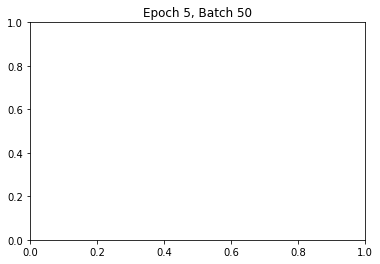

Text(0.5,1,u'Epoch 5, Batch 100')

('MSE Train: ', 0.0001849188)
('MSE Test: ', 0.034909286)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91098666  0.91016614  0.90931088 ...,  0.97695088  0.9656468
  0.97362411]


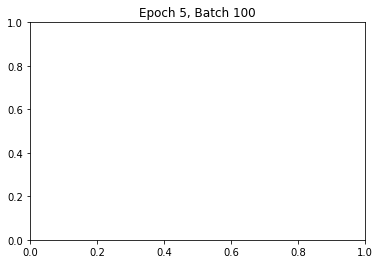

Text(0.5,1,u'Epoch 6, Batch 0')

('MSE Train: ', 0.00013448832)
('MSE Test: ', 0.029318025)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.8962239   0.89549398  0.89460135 ...,  0.94872177  0.9376868
  0.94569564]


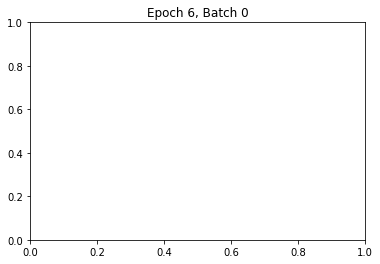

Text(0.5,1,u'Epoch 6, Batch 50')

('MSE Train: ', 0.00010556328)
('MSE Test: ', 0.023253219)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88818938  0.88728386  0.88640261 ...,  0.91619033  0.90546244
  0.91321844]


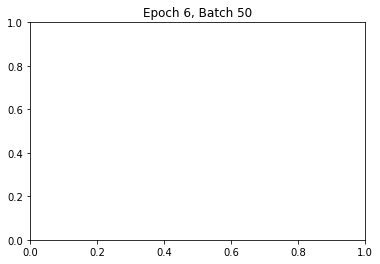

Text(0.5,1,u'Epoch 6, Batch 100')

('MSE Train: ', 9.3148818e-05)
('MSE Test: ', 0.023821723)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89707929  0.89614612  0.89524221 ...,  0.92643952  0.91560537
  0.92351973]


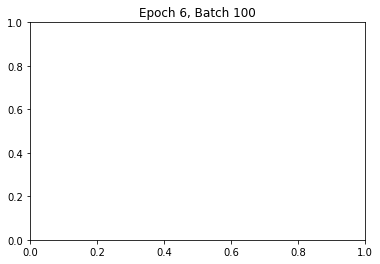

Text(0.5,1,u'Epoch 7, Batch 0')

('MSE Train: ', 0.00019795008)
('MSE Test: ', 0.021568006)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88398302  0.88301009  0.88211924 ...,  0.92076117  0.9098565
  0.91787225]


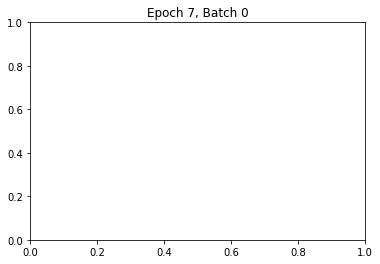

Text(0.5,1,u'Epoch 7, Batch 50')

('MSE Train: ', 7.5171803e-05)
('MSE Test: ', 0.022448922)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89638948  0.89524847  0.89449936 ...,  0.91893959  0.90791768
  0.91596842]


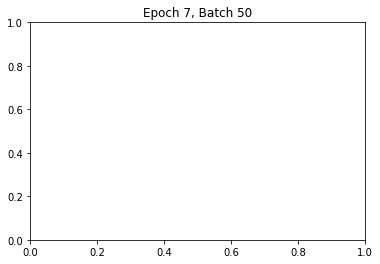

Text(0.5,1,u'Epoch 7, Batch 100')

('MSE Train: ', 8.8170302e-05)
('MSE Test: ', 0.024061928)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91169208  0.9105199   0.90973258 ...,  0.92651021  0.91540396
  0.92353916]


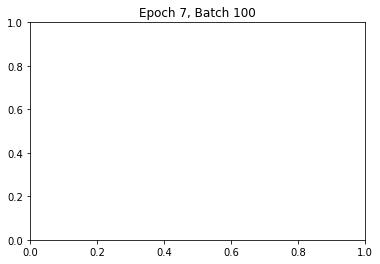

Text(0.5,1,u'Epoch 8, Batch 0')

('MSE Train: ', 0.00029492954)
('MSE Test: ', 0.026534323)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.93114215  0.93009549  0.92921418 ...,  0.93110341  0.92029703
  0.9282226 ]


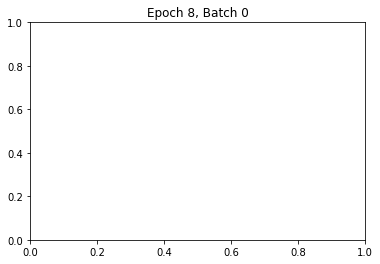

Text(0.5,1,u'Epoch 8, Batch 50')

('MSE Train: ', 0.00018386856)
('MSE Test: ', 0.018909808)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.88996196  0.8887251   0.88791829 ...,  0.88932246  0.87880421
  0.88681525]


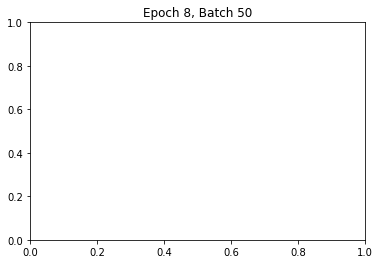

Text(0.5,1,u'Epoch 8, Batch 100')

('MSE Train: ', 0.00010254934)
('MSE Test: ', 0.019720715)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91119927  0.91024184  0.90912157 ...,  0.89902049  0.88848454
  0.8965593 ]


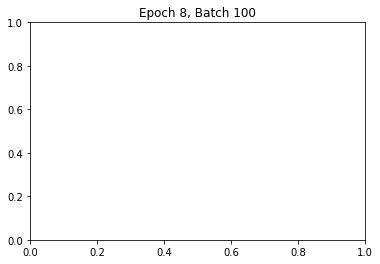

Text(0.5,1,u'Epoch 9, Batch 0')

('MSE Train: ', 9.1115151e-05)
('MSE Test: ', 0.01896669)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.89710629  0.89590126  0.89504576 ...,  0.88930577  0.87885088  0.886944  ]


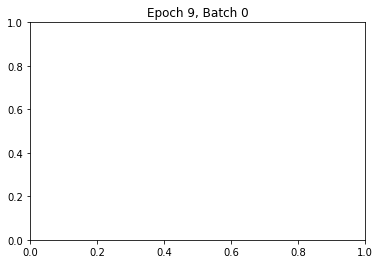

Text(0.5,1,u'Epoch 9, Batch 50')

('MSE Train: ', 8.103728e-05)
('MSE Test: ', 0.019401282)
Stored 'pred' (ndarray)
<type 'numpy.ndarray'>
[ 0.91364777  0.91247791  0.91159487 ...,  0.8917135   0.8812902   0.8894769 ]


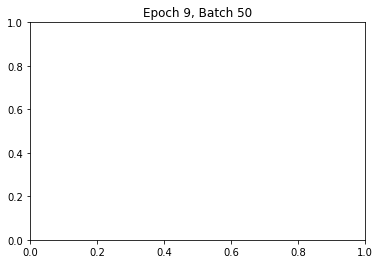

Text(0.5,1,u'Epoch 9, Batch 100')

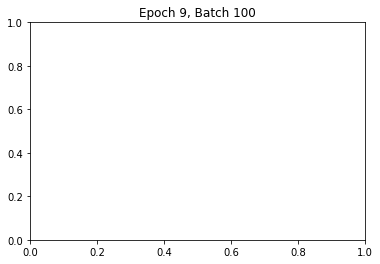

In [4]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

print("weight initializer")
print(weight_initializer([n_stocks, n_neurons_1]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
# plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 2.5)
# print(line2)
# plt.show()

# Fit neural net
batch_size = 256
mse_train = []
mse_test = []

# Run
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            
            %store pred
            
            print(type(pred))
            print(pred[0])
            line2.set_ydata(pred[0])
            plt.show()
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#             plt.pause(0.01)

